In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
y_true = (0.75*x_data) + 5 + noise

In [7]:
my_data = pd.concat([pd.DataFrame(data=x_data, columns=['X Data']), pd.DataFrame(data=y_true, columns=['Y'])], axis=1)

<AxesSubplot:xlabel='X Data', ylabel='Y'>

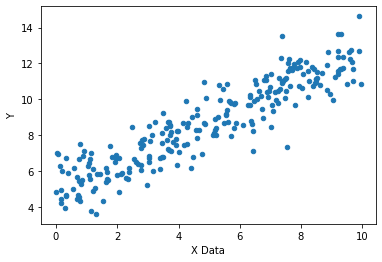

In [8]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
with tf.device('device:GPU:0'):
    m = tf.Variable(tf.ones([1], tf.float32))
    b = tf.Variable(tf.ones([1], tf.float32))
    xph = tf.placeholder(tf.float32,[10])
    yph = tf.placeholder(tf.float32,[10])
    y = m * xph + b
    error = tf.reduce_sum(tf.square(y-yph))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train = optimizer.minimize(error)
    

In [20]:
init = tf.global_variables_initializer()

In [22]:
config = tf.ConfigProto()
config.log_device_placement = True
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True

In [23]:
with tf.Session(config = config) as sess:
    sess.run(init)
    epoch = 1000
    for i in range(epoch):
        rand_ind = np.random.randint(len(x_data), size=10)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    model_m, model_b = sess.run([m,b])

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6



In [24]:
model_m

array([nan], dtype=float32)

In [25]:
model_b

array([nan], dtype=float32)